# Imports

In [8]:
import sys
import copy
import numpy as np
from model.base import CovidModel, SimulationParameters, set_parameters, normal_ci
from utils import BasicStatistics, RemovePolicy, Propaganda, setup_city_layout,confidence_interval,multiple_runs
from model.utils import SocialPolicy

# Parameters settings

Default parameters. Unless explicitly overriden, these values are used in all scenarios

In [9]:
common_parameters = SimulationParameters(
    mask_user_rate = 0.0,
    mask_efficacy = 0.0,
    imune_rate = 0.01,
    initial_infection_rate = 0.01,
    hospitalization_capacity = 0.05,
    latency_period_shape = 3,
    latency_period_scale = 1, 
    incubation_period_shape = 6,
    incubation_period_scale = 1, 
    mild_period_duration_shape = 14,
    mild_period_duration_scale = 1,
    hospitalization_period_duration_shape = 12,
    hospitalization_period_duration_scale = 1,
    symptomatic_isolation_rate = 0.0,
    asymptomatic_contagion_probability =    0.1,
    risk_tolerance_mean = 0.7,
    risk_tolerance_stdev = 0.2,
    herding_behavior_mean = 0.7,
    herding_behavior_stdev = 0.2,
    allowed_restaurant_capacity = 1.0, # valid values: {1.0, 0.50, 0.25}
    spreading_rate = normal_ci(2.41, 3.90, 20),
    extroversion_mean = 0.5,
    extroversion_stdev = 0.2,
    min_behaviors_to_copy = 1
    debug_each_n_cycles = 20   
)


# Simulation setup

In [10]:
population_size = 1000
simulation_cycles = 180 # days

In [11]:
seed = 314

In [12]:
np.random.seed(seed)
scenario = {}

# Scenarios

## Scenario 1

Do nothing.  In order to print out where every agent is for every step of the day, every 20 days, set debug to True when you make the CovidModel.  You can also set debug to True on multiple runs to print stats out there as well.

In [13]:
sc = 1
params = copy.deepcopy(common_parameters)
set_parameters(params)
#model = CovidModel(debug = True)
model = CovidModel()
seed = 4
np.random.seed(seed)
setup_city_layout(model, population_size)

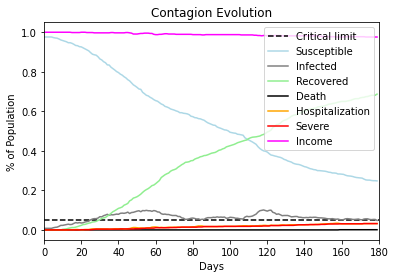

In [14]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

To save time these samples were run with 3 runs, but significant results often require 30 runs, so these numbers should be changed during debugging.

In [15]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[7533, 9472, 2596, 2016, 9215, 3594, 5184, 4562, 5808, 9408, 6019, 6166, 9371, 9853, 3725, 1870, 9406, 2675, 2535, 356, 7218, 3370, 8954, 3645, 6955, 3963, 8871, 3709, 5732, 2799]
run with seed 7533:
run with seed 9472:
run with seed 2596:
run with seed 2016:
run with seed 9215:
run with seed 3594:
run with seed 5184:
run with seed 4562:
run with seed 5808:
run with seed 9408:
run with seed 6019:
run with seed 6166:
run with seed 9371:
run with seed 9853:
run with seed 3725:
run with seed 1870:
run with seed 9406:
run with seed 2675:
run with seed 2535:
run with seed 356:
run with seed 7218:
run with seed 3370:
run with seed 8954:
run with seed 3645:
run with seed 6955:
run with seed 3963:
run with seed 8871:
run with seed 3709:
run with seed 5732:
run with seed 2799:
using average of time series:
stats on susceptible:
data: [0.2212055555555556, 0.8835606564648484, 0.7871555555555555, 0.9127944444444445, 0.95405, 0.17637777777777777, 0.2

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 2

Complete lockdown

In [35]:
sc = 2
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]
set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)

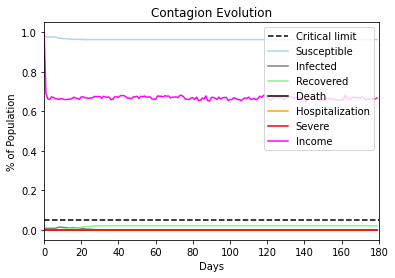

In [36]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [37]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[548, 7849, 4009, 6904, 4492, 2909, 2971, 1585, 8616, 9888, 854, 6402, 792, 4150, 2840, 4355, 2112, 6563, 6380, 8678, 7024, 3111, 7299, 7886, 4233, 771, 5571, 1504, 2288, 1650]
run with seed 548:
run with seed 7849:
run with seed 4009:
run with seed 6904:
run with seed 4492:
run with seed 2909:
run with seed 2971:
run with seed 1585:
run with seed 8616:
run with seed 9888:
run with seed 854:
run with seed 6402:
run with seed 792:
run with seed 4150:
run with seed 2840:
run with seed 4355:
run with seed 2112:
run with seed 6563:
run with seed 6380:
run with seed 8678:
run with seed 7024:
run with seed 3111:
run with seed 7299:
run with seed 7886:
run with seed 4233:
run with seed 771:
run with seed 5571:
run with seed 1504:
run with seed 2288:
run with seed 1650:
using average of time series:
stats on susceptible:
data: [0.9755944444444441, 0.9661333333333333, 0.9800000000000003, 0.9413833333333333, 0.956238206238206, 0.9558555555555555, 

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 3

Start with complete lockdown then gradually unlock schools on simulation day 30, 60 and 90


In [38]:
sc = 3
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

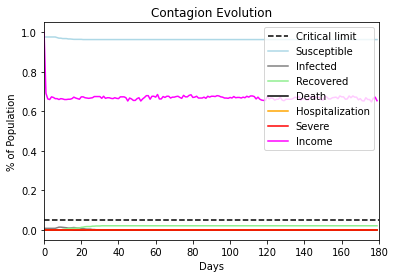

In [39]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [40]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[5803, 9344, 6361, 5462, 7845, 2990, 5304, 6677, 6529, 5772, 6638, 3009, 9646, 3668, 1865, 8127, 205, 749, 713, 4764, 3733, 7719, 6747, 5896, 4410, 132, 8293, 3329, 892, 3269]
run with seed 5803:
run with seed 9344:
run with seed 6361:
run with seed 5462:
run with seed 7845:
run with seed 2990:
run with seed 5304:
run with seed 6677:
run with seed 6529:
run with seed 5772:
run with seed 6638:
run with seed 3009:
run with seed 9646:
run with seed 3668:
run with seed 1865:
run with seed 8127:
run with seed 205:
run with seed 749:
run with seed 713:
run with seed 4764:
run with seed 3733:
run with seed 7719:
run with seed 6747:
run with seed 5896:
run with seed 4410:
run with seed 132:
run with seed 8293:
run with seed 3329:
run with seed 892:
run with seed 3269:
using average of time series:
stats on susceptible:
data: [0.971, 0.979022222222222, 0.5617111111111109, 0.9542027056997116, 0.5979277777777778, 0.8215055555555555, 0.4834666666666

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 4

Like scenario 3 but simulate the start of a public campaing in day 30 to reinforce the importance of social distancing and consequently reduce the overall risk tolerance of the population

In [41]:
sc = 4
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

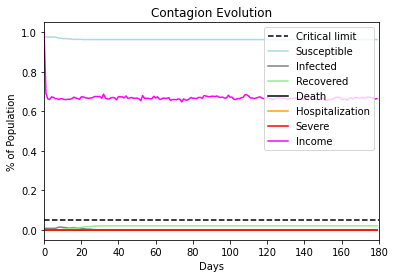

In [42]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [43]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[7914, 4575, 2778, 7109, 3586, 9429, 9029, 6860, 3466, 2546, 736, 4815, 802, 28, 596, 1322, 1789, 3397, 7544, 9433, 9689, 9662, 1758, 7270, 451, 3934, 5068, 7262, 861, 6073]
run with seed 7914:
run with seed 4575:
run with seed 2778:
run with seed 7109:
run with seed 3586:
run with seed 9429:
run with seed 9029:
run with seed 6860:
run with seed 3466:
run with seed 2546:
run with seed 736:
run with seed 4815:
run with seed 802:
run with seed 28:
run with seed 596:
run with seed 1322:
run with seed 1789:
run with seed 3397:
run with seed 7544:
run with seed 9433:
run with seed 9689:
run with seed 9662:
run with seed 1758:
run with seed 7270:
run with seed 451:
run with seed 3934:
run with seed 5068:
run with seed 7262:
run with seed 861:
run with seed 6073:
using average of time series:
stats on susceptible:
data: [0.9020055555555558, 0.5430111111111111, 0.9512722222222222, 0.4607722222222222, 0.3528666666666667, 0.4054888888888889, 0.856

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 5

Like scenario 4 but start the campaing in day 1

In [44]:
sc = 5
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 90))

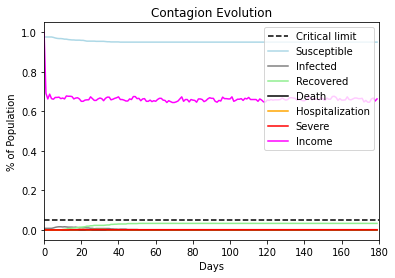

In [45]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [46]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[1177, 3089, 8934, 9122, 824, 3975, 4843, 7645, 7996, 9336, 5925, 659, 883, 4138, 3703, 6896, 208, 7690, 1023, 3828, 10, 9946, 9231, 5954, 8946, 9833, 1644, 7924, 6837, 6836]
run with seed 1177:
run with seed 3089:
run with seed 8934:
run with seed 9122:
run with seed 824:
run with seed 3975:
run with seed 4843:
run with seed 7645:
run with seed 7996:
run with seed 9336:
run with seed 5925:
run with seed 659:
run with seed 883:
run with seed 4138:
run with seed 3703:
run with seed 6896:
run with seed 208:
run with seed 7690:
run with seed 1023:
run with seed 3828:
run with seed 10:
run with seed 9946:
run with seed 9231:
run with seed 5954:
run with seed 8946:
run with seed 9833:
run with seed 1644:
run with seed 7924:
run with seed 6837:
run with seed 6836:
using average of time series:
stats on susceptible:
data: [0.5957222222222224, 0.2972833333333333, 0.76425, 0.9667721167721167, 0.3004555555555556, 0.4955833333333333, 0.550016666666

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 6

Begins with complete lockdown for 30 days, then all sectors are being gradually "unlocked"

In [47]:
sc = 6
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

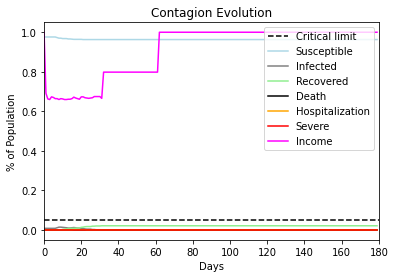

In [48]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [49]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[2848, 4176, 2241, 4239, 6909, 751, 9017, 5092, 640, 1630, 740, 6950, 8615, 8417, 3043, 3440, 6154, 3812, 3701, 866, 4957, 8170, 456, 4543, 2084, 9618, 6245, 2747, 6262, 2810]
run with seed 2848:
run with seed 4176:
run with seed 2241:
run with seed 4239:
run with seed 6909:
run with seed 751:
run with seed 9017:
run with seed 5092:
run with seed 640:
run with seed 1630:
run with seed 740:
run with seed 6950:
run with seed 8615:
run with seed 8417:
run with seed 3043:
run with seed 3440:
run with seed 6154:
run with seed 3812:
run with seed 3701:
run with seed 866:
run with seed 4957:
run with seed 8170:
run with seed 456:
run with seed 4543:
run with seed 2084:
run with seed 9618:
run with seed 6245:
run with seed 2747:
run with seed 6262:
run with seed 2810:
using average of time series:
stats on susceptible:
data: [0.48810000000000003, 0.4301222222222222, 0.44193333333333334, 0.6199333333333334, 0.4157555555555556, 0.5046666666666667,

(<function dict.items>, <function dict.items>, <function dict.items>)

## Scenario 7

Like scenario 6 but in day 1 a campaign to encourage social distancing is started and the overall risk tolerance of people starts decreasing gradually.

In [50]:
sc = 7
params = copy.deepcopy(common_parameters)
params.params['social_policies'] = [
    SocialPolicy.LOCKDOWN_OFFICE,
    SocialPolicy.LOCKDOWN_FACTORY,
    SocialPolicy.LOCKDOWN_RETAIL,
    SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL,
    SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL,
    SocialPolicy.LOCKDOWN_HIGH_SCHOOL,
    SocialPolicy.SOCIAL_DISTANCING
]

set_parameters(params)
model = CovidModel()
np.random.seed(seed)
setup_city_layout(model, population_size)
model.add_listener(Propaganda(model, 1))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_RETAIL, 30))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_FACTORY, 60))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_OFFICE, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_ELEMENTARY_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_MIDDLE_SCHOOL, 90))
model.add_listener(RemovePolicy(model, SocialPolicy.LOCKDOWN_HIGH_SCHOOL, 120))

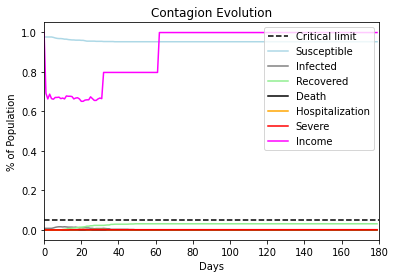

In [51]:
model.reset_randomizer(seed)
statistics = BasicStatistics(model)
model.add_listener(statistics)
for i in range(simulation_cycles):
    model.step()
statistics.export_chart("scenario" + str(sc) + ".png")
statistics.export_csv("scenario" + str(sc) + ".csv")

In [52]:
 multiple_runs(params,population_size,simulation_cycles,num_runs=30,do_print = True)

Save these seeds if you want to rerun a scenario
[1897, 1739, 7081, 7667, 6479, 730, 7545, 6442, 1113, 5550, 2504, 9618, 1258, 3935, 5906, 4179, 3269, 5708, 8646, 310, 7287, 3927, 2776, 9400, 3307, 5252, 3736, 316, 8684, 8486]
run with seed 1897:
run with seed 1739:
run with seed 7081:
run with seed 7667:
run with seed 6479:
run with seed 730:
run with seed 7545:
run with seed 6442:
run with seed 1113:
run with seed 5550:
run with seed 2504:
run with seed 9618:
run with seed 1258:
run with seed 3935:
run with seed 5906:
run with seed 4179:
run with seed 3269:
run with seed 5708:
run with seed 8646:
run with seed 310:
run with seed 7287:
run with seed 3927:
run with seed 2776:
run with seed 9400:
run with seed 3307:
run with seed 5252:
run with seed 3736:
run with seed 316:
run with seed 8684:
run with seed 8486:
using average of time series:
stats on susceptible:
data: [0.182983682983683, 0.3104111111111111, 0.35265, 0.9319984490971527, 0.9334388888888889, 0.3034888888888889, 0.9729611

(<function dict.items>, <function dict.items>, <function dict.items>)